In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')

# 读取并展示数据

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
from copy import deepcopy

train_ = deepcopy(train)
test_ = deepcopy(test)

In [5]:
train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

需要修复的数据有

- train: age, cabin
- test: age, fare, cabin

**其中Cabin数据欠缺太多，考虑drop掉**

# Feature Engineering

每一个feature的处理方式都大概有这么几个部分

- 查看数据分布情况（train & test）
- 看feature和预测结果（离散）的相关性
    - 离散
        - sns.pointplot(data=train, x='Embarked', y='Survived')
    - 连续
        - sns.boxplot(data=train, x='Survived', y='Age')
        - train[['feature', 'result']].corr()，也可以用heatmap打印出来，最后有例子
- 填补数据：如果有空缺。开始train.info()的时候已经mark

这个阶段不要删除feature，后面可能要循环往复不断优化

## Embarked

In [6]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


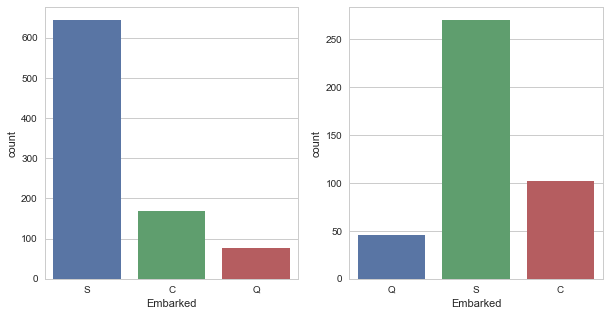

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=train, x='Embarked', ax=ax1)
sns.countplot(data=test, x='Embarked', ax=ax2)

In [8]:
train.Embarked.fillna('S', inplace=True)

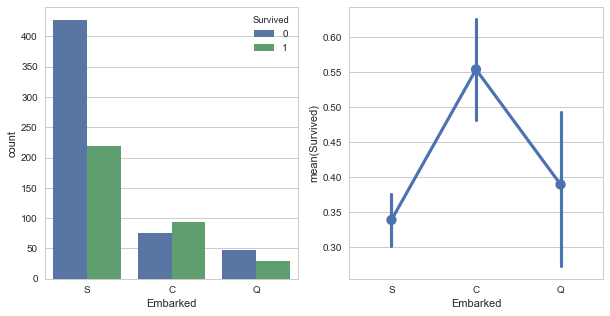

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=train, x='Embarked', hue='Survived', ax=ax1)
sns.pointplot(data=train, x='Embarked', y='Survived', ax=ax2)

In [10]:
train = train.join(pd.get_dummies(train.Embarked, prefix='Embarked'))
test = test.join(pd.get_dummies(test.Embarked, prefix='Embarked'))

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


## Fare

test空缺用test数据的信息来补全

In [11]:
test.loc[test['Fare'].isnull(), 'Fare'] = test.Fare.mean()

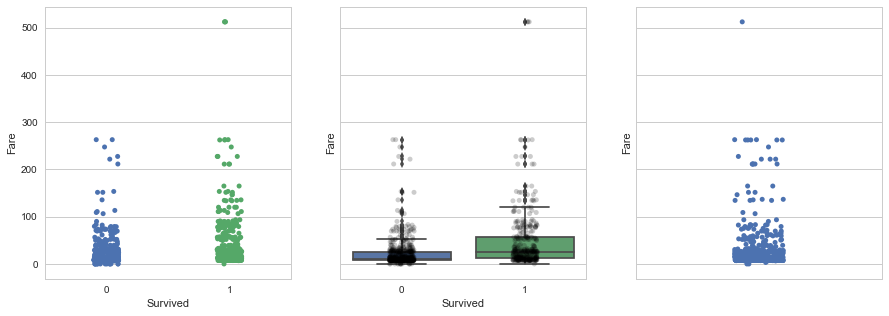

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.stripplot(data=train, x='Survived', y='Fare', jitter=True, ax=ax1)

sns.stripplot(data=train, x='Survived', y='Fare', jitter=True, color='black', alpha=0.2, ax=ax2)
sns.boxplot(data=train, x='Survived', y='Fare', ax=ax2)

sns.stripplot(data=test, y='Fare', jitter=True, ax=ax3)

## Age

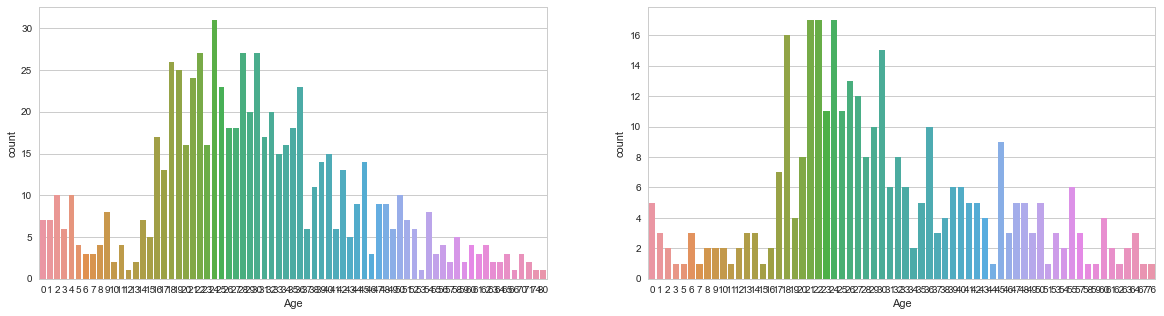

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 5))

sns.countplot(train.Age.dropna().astype(int), ax=ax1)
sns.countplot(test.Age.dropna().astype(int), ax=ax2)

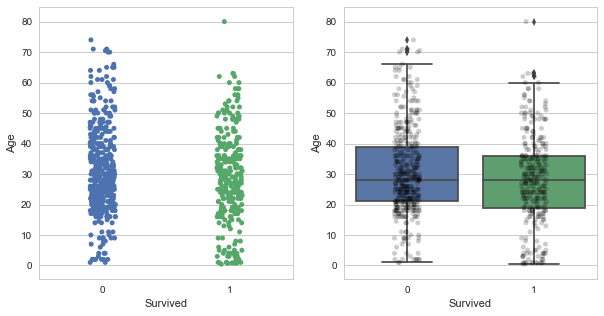

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

sns.stripplot(data=train, x='Survived', y='Age', jitter=True, ax=ax1)

sns.stripplot(data=train, x='Survived', y='Age', jitter=True, color='black', alpha=0.2, ax=ax2)
sns.boxplot(data=train, x='Survived', y='Age', ax=ax2)

### 修复数据

因为Age感性认为，是个比较重要的信息，因此必须想办法修复。先找到和Age最相关的Feature，然后通过那几个Feature划分的“矩阵”，每个里面求平均，赋予本块内为NaN的Age。最终，还是需要check一下是否都修复完。

In [15]:
train_age_not_null = train[train.Age.notnull()].copy()
train_age_not_null.corr().Age.map(lambda x: -x if x < 0 else x).sort_values(ascending=False)

Age            1.000000
Pclass         0.369226
SibSp          0.308247
Parch          0.189119
Fare           0.096067
Survived       0.077221
PassengerId    0.036847
Embarked_C     0.036261
Embarked_S     0.023233
Embarked_Q     0.022405
Name: Age, dtype: float64

可以发现，Pclass，SibSp是最和年龄比较相关的Feature。不过由于**很多feature现在还是categorical（比如Cabin），不是numerical，没有体现在corr中，所以哪些feature和Age最相关，现在还不能做出完整的判断**

## Cabin

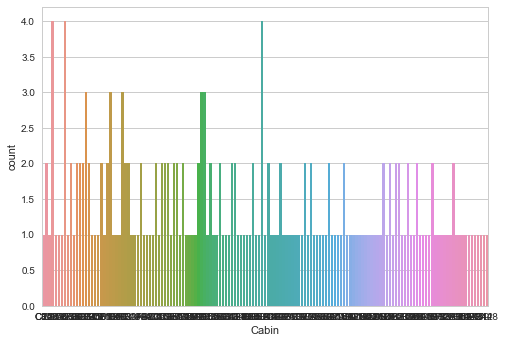

In [16]:
sns.countplot(train.Cabin)

```
train['Cabin'] = train.Cabin.fillna('U').map(lambda x: x[0])
test['Cabin'] = test.Cabin.fillna('U').map(lambda x: x[0])

train = train.join(pd.get_dummies(train.Cabin, prefix='Cabin'))
test = test.join(pd.get_dummies(test.Cabin, prefix='Cabin'))
```


加入了Cabin的首字母feature后，几个模型的预测结果下降了

```
Without Cabin First Letter
GradientBoostingClassifier  0.836872
LogisticRegression  0.816760
AdaBoostClassifier  0.805028
LinearDiscriminantAnalysis  0.800000
GaussianNB  0.779888

with Cabin First Letter
AdaBoostClassifier  0.812849
GradientBoostingClassifier  0.811173
LogisticRegression  0.806704
LinearDiscriminantAnalysis  0.797207
GaussianNB  0.740223
```
故去掉Cabin

不过话说回来，最开始发行Cabin欠缺的数据太多，其实已经完全可以考虑drop掉了。前面的那个countplot没有把NaN表示出来，有些误导。

## Family (SibSp & Parch)

如果要画多行的figure，注意ax返回值的类型是**[[ax1, ax2], [ax3, ax4]]**

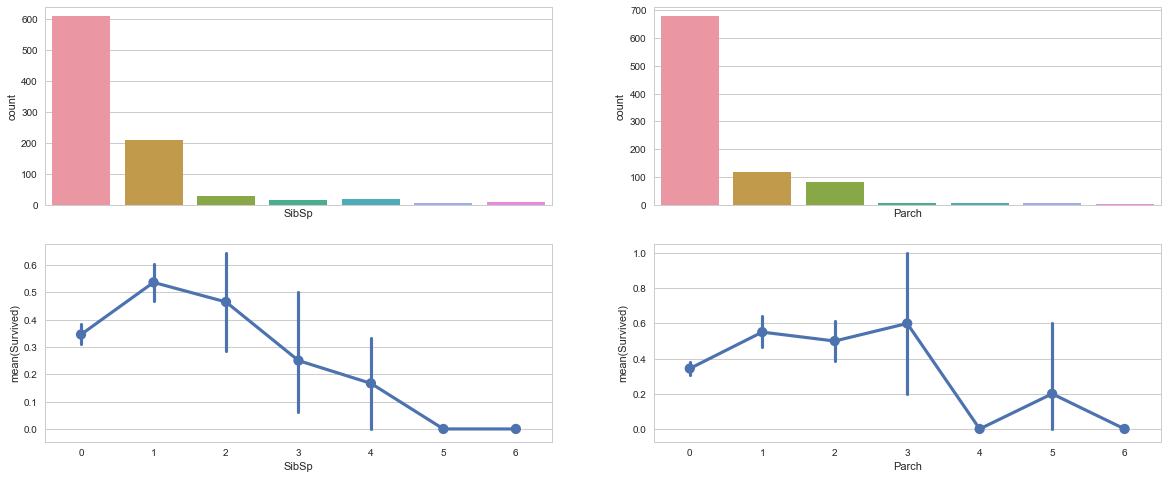

In [17]:
fig, ([[ax1, ax2], [ax3, ax4]]) = plt.subplots(2, 2, figsize=(20, 8), sharex=True)
sns.countplot(data=train, x='SibSp', ax=ax1)
sns.countplot(data=train, x='Parch', ax=ax2)

sns.pointplot(data=train, x='SibSp', y='Survived', ax=ax3)
sns.pointplot(data=train, x='Parch', y='Survived', ax=ax4)

In [18]:
train['Family_Size'] = train.SibSp + train.Parch
test['Family_Size'] = test.SibSp + test.Parch

train['With_Family'] = train['Family_Size'].apply(lambda x: 0 if x == 0 else 1)
test['With_Family'] = test['Family_Size'].apply(lambda x: 0 if x == 0 else 1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Family_Size,With_Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0


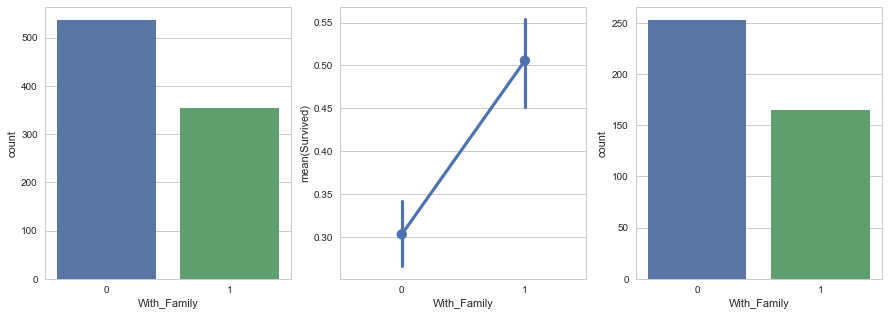

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(data=train, x='With_Family', ax=ax1)
sns.pointplot(data=train, x='With_Family', y='Survived', ax=ax2)

sns.countplot(data=test, x='With_Family', ax=ax3)

## Sex

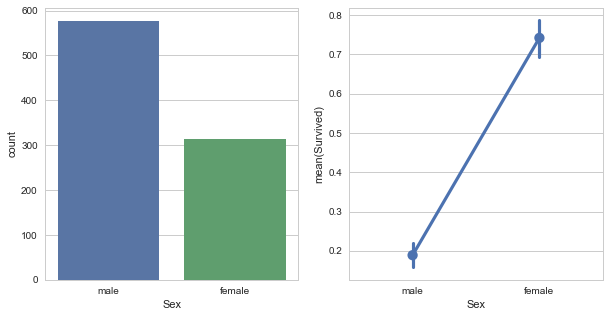

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=train, x='Sex', ax=ax1)
sns.pointplot(data=train, x='Sex', y='Survived', ax=ax2)

In [21]:
train = train.join(pd.get_dummies(train.Sex, prefix='Sex'))
test = test.join(pd.get_dummies(test.Sex, prefix='Sex'))

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Family_Size,With_Family,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0,1


## Pclass

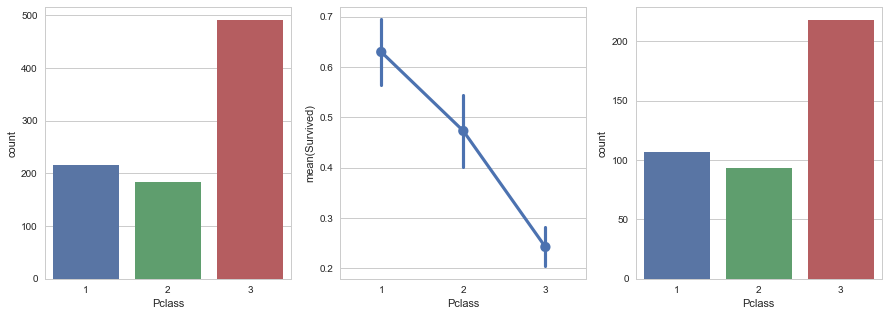

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(data=train, x='Pclass', ax=ax1)
sns.pointplot(data=train, x='Pclass', y='Survived', ax=ax2)

sns.countplot(data=test, x='Pclass', ax=ax3)

In [23]:
train = train.join(pd.get_dummies(train.Pclass, prefix='Pclass'))
test = test.join(pd.get_dummies(test.Pclass, prefix='Pclass'))

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_C,Embarked_Q,Embarked_S,Family_Size,With_Family,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,1,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,1,1,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,1,1,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,0,0,1,0,0,1


## Name & Title

In [24]:
import re as re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    return title_search.group(1) if title_search else "_NO_TITLE_"

In [25]:
train['Title'] = train.Name.apply(get_title)
test['Title'] = test.Name.apply(get_title)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_Q,Embarked_S,Family_Size,With_Family,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,1,1,0,1,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,1,1,0,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,1,0,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,1,1,1,0,1,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,0,0,1,0,0,1,Mr


In [26]:
pd.concat([train.Title, test.Title]).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

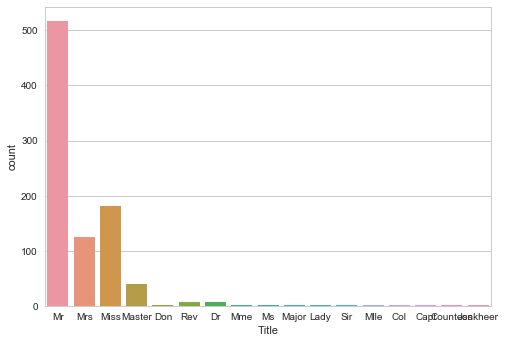

In [27]:
sns.countplot(data=train, x='Title')

In [28]:
TITLE_DICTIONARY = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "Countess":   "Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

train['Title'] = train.Title.map(TITLE_DICTIONARY)
test['Title'] = test.Title.map(TITLE_DICTIONARY)

train = train.join(pd.get_dummies(train.Title, prefix='Title'))
test = test.join(pd.get_dummies(test.Title, prefix='Title'))

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_1,Pclass_2,Pclass_3,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,Mr,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,Mrs,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,Miss,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,Mrs,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,Mr,0,0,1,0,0,0


## Age 修复

In [29]:
train_age_not_null = train[train.Age.notnull()].copy()
train_age_not_null.corr().Age.map(lambda x: -x if x < 0 else x).sort_values(ascending=False)

Age              1.000000
Title_Master     0.398827
Pclass           0.369226
Pclass_1         0.348941
Pclass_3         0.312271
SibSp            0.308247
Family_Size      0.301914
Title_Miss       0.278113
Title_Mr         0.206341
With_Family      0.198270
Parch            0.189119
Title_Officer    0.182967
Title_Mrs        0.176950
Fare             0.096067
Sex_male         0.093254
Sex_female       0.093254
Survived         0.077221
Title_Royalty    0.068847
PassengerId      0.036847
Embarked_C       0.036261
Embarked_S       0.023233
Embarked_Q       0.022405
Pclass_2         0.006954
Name: Age, dtype: float64

显而易见Title, Pclass是最相关的2个feature

最终的结果表明，这个假设非常成功
```
pclass
GradientBoostingClassifier  0.837989
AdaBoostClassifier  0.806145
GradientBoostingClassifier  0.827933
AdaBoostClassifier  0.814525
AdaBoostClassifier  0.822905
GradientBoostingClassifier  0.822905

pclass & title
GradientBoostingClassifier  0.844134
AdaBoostClassifier  0.826257
GradientBoostingClassifier  0.828492
AdaBoostClassifier  0.812849
GradientBoostingClassifier  0.834078
AdaBoostClassifier  0.816760
```

In [30]:
pclass_uniques = pd.concat([train, test]).Pclass.unique()
title_uniques = pd.concat([train, test]).Title.unique()

for p_class in pclass_uniques:
    for title in title_uniques:
        if np.isnan(p_class):
            continue
        
        train_idx = (train.Pclass == p_class) & (train.Title == title)
        if train[train_idx].Age.isnull().sum() != 0:
            mean, std, num = train[train_idx].Age.mean(), train[train_idx].Age.std(), train[train_idx].Age.isnull().sum()
            train.loc[train_idx & train.Age.isnull(), 'Age'] = np.random.randint(mean - std, mean + std, num)
        
        test_idx = (test.Pclass == p_class) & (test.Title == title)
        if test[test_idx].Age.isnull().sum() != 0:
            mean, std, num = test[test_idx].Age.mean(), test[test_idx].Age.std(), test[test_idx].Age.isnull().sum()
            test.loc[test_idx & test.Age.isnull(), 'Age'] = np.random.randint(mean - std, mean + std, num)
    
train.Age.isnull().any(), test.Age.isnull().any()

(False, False)

# 构造新Feature

同样，这里构造新Feature，但是不删除旧Feature。其实，从来都不需要删除Feature。

## Feature 相关性

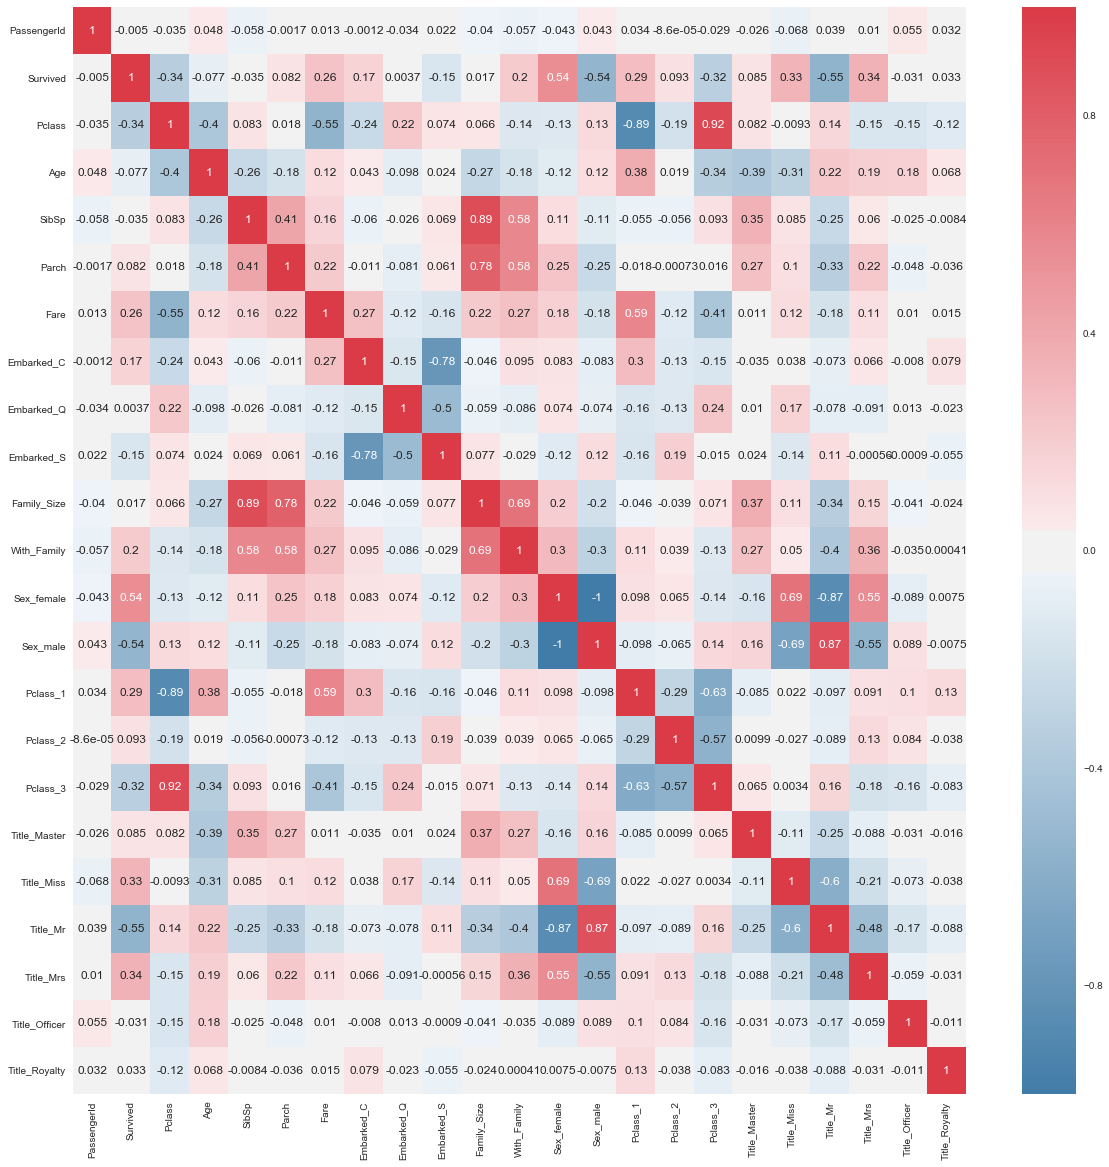

In [31]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train.corr(), annot=True, cmap=sns.diverging_palette(240, 10, as_cmap = True), ax=ax)

In [32]:
train.corr().Survived.map(lambda x: -x if x < 0 else x).sort_values(ascending=False)

Survived         1.000000
Title_Mr         0.549199
Sex_male         0.543351
Sex_female       0.543351
Title_Mrs        0.344935
Pclass           0.338481
Title_Miss       0.332795
Pclass_3         0.322308
Pclass_1         0.285904
Fare             0.257307
With_Family      0.203367
Embarked_C       0.168240
Embarked_S       0.149683
Pclass_2         0.093349
Title_Master     0.085221
Parch            0.081629
Age              0.077335
SibSp            0.035322
Title_Royalty    0.033391
Title_Officer    0.031316
Family_Size      0.016639
PassengerId      0.005007
Embarked_Q       0.003650
Name: Survived, dtype: float64

和Survived最相关的Feature依次是title，sex，pclass

## Age_Bin

通过数量分布countplot和概率factorplot/pointplot尝试寻找合理的Bin size。

最终的结果证明这是一个成功的尝试。

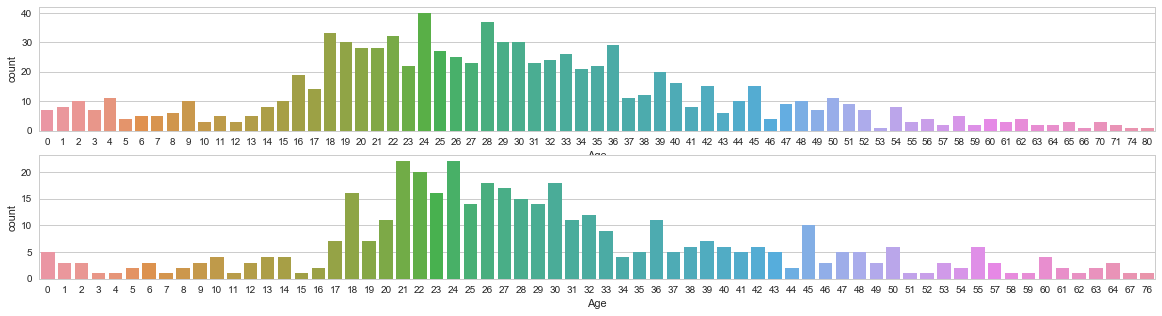

In [33]:
fig, ([ax1, ax2]) = plt.subplots(2, 1, figsize=(20, 5))

sns.countplot(train.Age.astype(int), ax=ax1)
sns.countplot(test.Age.astype(int), ax=ax2)

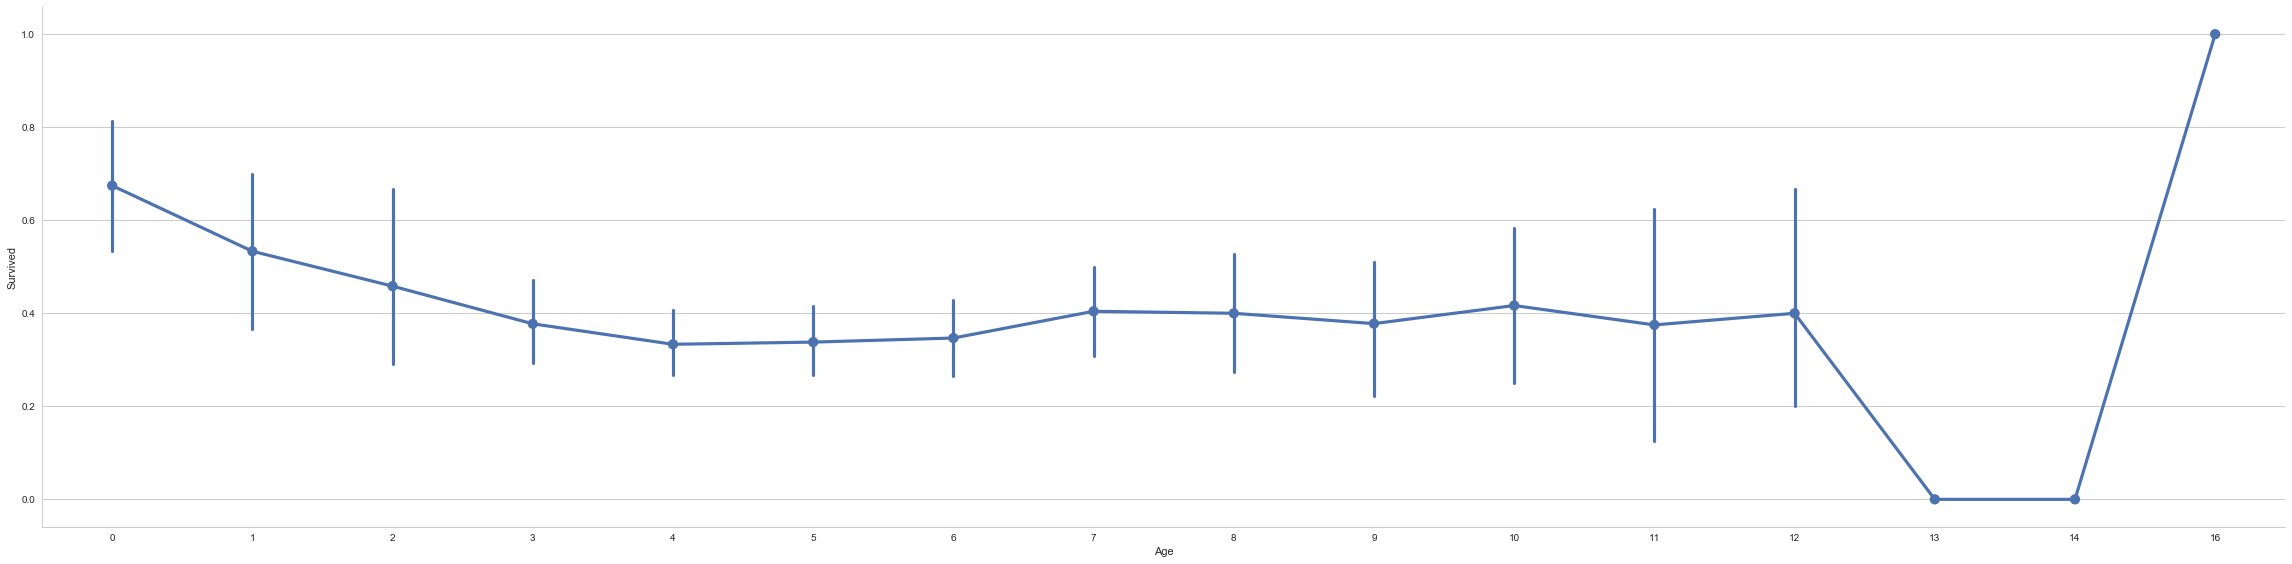

In [34]:
train_age_survived = train[['Age', 'Survived']].copy()
train_age_survived['Age'] = (train_age_survived.Age.astype(int) / 5).astype(int)

sns.factorplot(data=train_age_survived, x='Age', y='Survived', size=8, aspect=4)

In [35]:
train.loc[train.Age < 16, 'Age_Bin'] = 1
train.loc[(train.Age >= 16) & (train.Age < 30), 'Age_Bin'] = 2
train.loc[(train.Age >= 30) & (train.Age < 50), 'Age_Bin'] = 3
train.loc[(train.Age >= 50) & (train.Age < 66), 'Age_Bin'] = 4
train.loc[train.Age >= 66, 'Age_Bin'] = 5

test.loc[test.Age < 16, 'Age_Bin'] = 1
test.loc[(test.Age >= 16) & (test.Age < 30), 'Age_Bin'] = 2
test.loc[(test.Age >= 30) & (test.Age < 50), 'Age_Bin'] = 3
test.loc[(test.Age >= 50) & (test.Age < 66), 'Age_Bin'] = 4
test.loc[test.Age >= 66, 'Age_Bin'] = 5

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_2,Pclass_3,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Age_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,Mr,0,0,1,0,0,0,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,Mrs,0,0,0,1,0,0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,Miss,0,1,0,0,0,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,Mrs,0,0,0,1,0,0,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,Mr,0,0,1,0,0,0,3.0


## Age ^ 2
```
train['Age_2'] = np.square(train.Age)
test['Age_2'] = np.square(test.Age)
```
效果不是很理想，最终在Age,Age^2,Age_Bin,Age_Bin^2中选择Age_Bin

## Age_Bin ^ 2
```
train['Age_Bin_2'] = np.square(train.Age_Bin)
test['Age_Bin_2'] = np.square(test.Age_Bin)
train.head()
```
这个没有让结果更好，说明区分开就可以，认为地设置平方，不一定，不一定能获得好的效果

## Sex_Child

证明是个成功的尝试
```
male female
GradientBoostingClassifier  0.844134
AdaBoostClassifier  0.826257
GradientBoostingClassifier  0.828492
AdaBoostClassifier  0.812849
GradientBoostingClassifier  0.834078
AdaBoostClassifier  0.816760

male female child 
GradientBoostingClassifier  0.844693
AdaBoostClassifier  0.813408
GradientBoostingClassifier  0.836872
AdaBoostClassifier  0.817318
GradientBoostingClassifier  0.831844
AdaBoostClassifier  0.817318
```

In [36]:
train['Sex_Age'] = train.Sex
test['Sex_Age'] = test.Sex

train.loc[train.Age < 16, 'Sex_Age'] = 'child'
test.loc[test.Age < 16, 'Sex_Age'] = 'child'

train = train.join(pd.get_dummies(train.Sex_Age, prefix='Sex_Age'))
test = test.join(pd.get_dummies(test.Sex_Age, prefix='Sex_Age'))

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Age_Bin,Sex_Age,Sex_Age_child,Sex_Age_female,Sex_Age_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,2.0,male,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,3.0,female,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,0,2.0,female,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,3.0,female,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,0,0,3.0,male,0,0,1


## Fare_Bin

Feture Fare_Bin加入后，预测的结果反而降低了。

总结出一个经验，**最开始，先做一个做简单的模型出来，然后一点一点加Feature验证是否优化**，否则一开始，就把这个连续变Feature为bin，不可能再想把它去掉的，不符合逻辑顺序。

当然，对于连续Feature，一开始不要设置bin，不一定会有好的结果。

```
train.loc[train.Fare == 0, 'Fare_Bin'] = 1
train.loc[(train.Fare > 0) & (train.Fare < 50), 'Fare_Bin'] = 2
train.loc[(train.Fare >= 50) & (train.Fare < 100), 'Fare_Bin'] = 3
train.loc[(train.Fare >= 100) & (train.Fare < 200), 'Fare_Bin'] = 4
train.loc[train.Fare >= 200, 'Fare_Bin'] = 5

test.loc[test.Fare == 0, 'Fare_Bin'] = 1
test.loc[(test.Fare > 0) & (test.Fare < 50), 'Fare_Bin'] = 2
test.loc[(test.Fare >= 50) & (test.Fare < 100), 'Fare_Bin'] = 3
test.loc[(test.Fare >= 100) & (test.Fare < 200), 'Fare_Bin'] = 4
test.loc[test.Fare >= 200, 'Fare_Bin'] = 5
```

## Title & Sex => Title_Sex

尝试通过2个Feature组合成一个新Feature。如果sex title classs是两两不相关/正交的，那么Grid里的所有图片，应该完全一样。

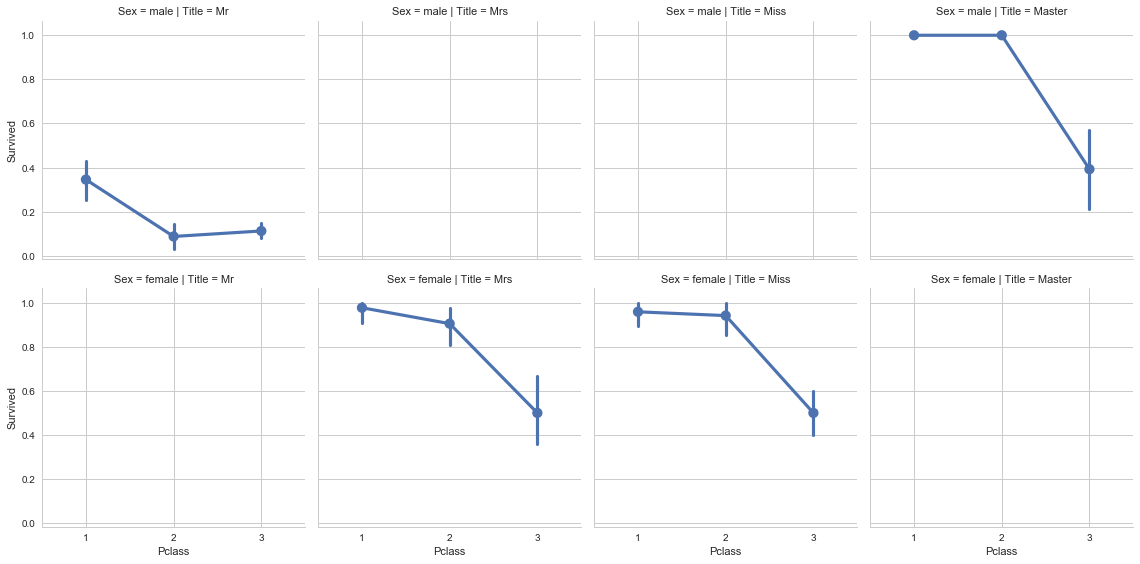

In [37]:
title_idx = (train.Title=='Mr') | (train.Title=='Mrs') | (train.Title=='Miss') | (train.Title=='Master')
sns.factorplot(data=train[title_idx], row='Sex', col='Title', x='Pclass', y='Survived')

```
train['Title_Sex'] = 0
test['Title_Sex'] = 0

v = 0
Title_Uniques = pd.concat([train.Title, test.Title]).unique()
Title_Uniques = ['Mr', 'Mrs', 'Miss', 'Master']
Sex_Uniques = pd.concat([train.Sex, test.Sex]).unique()

for title in Title_Uniques:
    print title
    for sex in Sex_Uniques:
        v = v + 1
        
        train_idx = (train.Title == title) & (train.Sex == sex)
        train.loc[train_idx, 'Title_Sex'] = v
        
        test_idx = (test.Title == title) & (test.Sex == sex)
        test.loc[test_idx, 'Title_Sex'] = v

missing_idx = train.Title_Sex == 0
train.loc[missing_idx & (train.Sex == 'male'), 'Title_Sex'] = v + 1
train.loc[missing_idx & (train.Sex == 'female'), 'Title_Sex'] = v + 2
```

不过结果似乎没有变化。

```
没有Title_Sex
GradientBoostingClassifier  0.825698
AdaBoostClassifier  0.813966
GradientBoostingClassifier  0.826257
AdaBoostClassifier  0.811732
GradientBoostingClassifier  0.831285
AdaBoostClassifier  0.816760

有Title_Sex
GradientBoostingClassifier  0.825698
AdaBoostClassifier  0.813966
GradientBoostingClassifier  0.833520
AdaBoostClassifier  0.818994
GradientBoostingClassifier  0.825140
AdaBoostClassifier  0.817877
```

# 数据整理

## 统一列数据

In [38]:
all_column_values = DataFrame(pd.concat([DataFrame(train.columns.values), DataFrame(test.columns.values)]))[0].unique()
all_column_values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Family_Size', 'With_Family',
       'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Title', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'Age_Bin', 'Sex_Age',
       'Sex_Age_child', 'Sex_Age_female', 'Sex_Age_male'], dtype=object)

In [39]:
train = train.reindex(columns=all_column_values, fill_value=0)
test = test.reindex(columns=all_column_values, fill_value=0).drop('Survived', axis=1)

# 建模预测

In [40]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [41]:
def plot_learning_curve(estimator, title, X, y, ylim=(0.6, 1.1), cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")

    return plt

def plot_roc_curve(y_test, y_pred, title = 'ROC curve', ylim=(0, 1)):
    plt.figure()

    fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
    plt.plot([0, 1], [0, 1], 'k--')

    plt.ylim(*ylim)

    plt.xlabel('FP rate')
    plt.ylabel('TP rate')

    plt.title(title)
    plt.legend(loc='best')

    return plt

In [42]:
X_all = train.drop(['PassengerId', 'Ticket', 'Name', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked'
                    , 'Family_Size', 'Title', 'Sex_female', 'Sex_male', 'Sex_Age', 'Age'
                    ,'Survived'], axis=1)
X_test = test.drop(['PassengerId', 'Ticket', 'Name', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked'
                    , 'Family_Size', 'Title', 'Sex_female', 'Sex_male', 'Sex_Age', 'Age'
                   ], axis=1)
y_all = train.Survived.copy()
cv = ShuffleSplit(test_size=0.2)

X_all.head()

,Pclass,Fare,Embarked_C,Embarked_Q,Embarked_S,With_Family,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Age_Bin,Sex_Age_child,Sex_Age_female,Sex_Age_male
0,3,7.2500,0,0,1,1,0,0,1,0,0,1,0,0,0,2.0,0,0,1
1,1,71.2833,1,0,0,1,1,0,0,0,0,0,1,0,0,3.0,0,1,0
2,3,7.9250,0,0,1,0,0,0,1,0,1,0,0,0,0,2.0,0,1,0
3,1,53.1000,0,0,1,1,1,0,0,0,0,0,1,0,0,3.0,0,1,0
4,3,8.0500,0,0,1,0,0,0,1,0,0,1,0,0,0,3.0,0,0,1


In [43]:
X_test.head()

,Pclass,Fare,Embarked_C,Embarked_Q,Embarked_S,With_Family,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Age_Bin,Sex_Age_child,Sex_Age_female,Sex_Age_male
0,3,7.8292,0,1,0,0,0,0,1,0,0,1,0,0,0,3.0,0,0,1
1,3,7.0000,0,0,1,1,0,0,1,0,0,0,1,0,0,3.0,0,1,0
2,2,9.6875,0,1,0,0,0,1,0,0,0,1,0,0,0,4.0,0,0,1
3,3,8.6625,0,0,1,0,0,0,1,0,0,1,0,0,0,2.0,0,0,1
4,3,12.2875,0,0,1,1,0,0,1,0,0,0,1,0,0,2.0,0,1,0


In [44]:
estimator_scores = {
    'LogisticRegression': cross_val_score(LogisticRegression(), X=X_all, y=y_all, cv=cv).mean(),
    'GradientBoostingClassifier': cross_val_score(GradientBoostingClassifier(), X=X_all, y=y_all, cv=cv).mean(),
    'AdaBoostClassifier': cross_val_score(AdaBoostClassifier(), X=X_all, y=y_all, cv=cv).mean(),
    'XGBClassifier': cross_val_score(XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05), X=X_all, y=y_all, cv=cv).mean(),
}
estimator_scores = DataFrame.from_dict(estimator_scores, orient='index')
estimator_scores.columns = ['score']
estimator_scores = estimator_scores.sort_values(by='score', ascending=False)
estimator_scores

,score
XGBClassifier,0.837989
GradientBoostingClassifier,0.812291
AdaBoostClassifier,0.810615
LogisticRegression,0.802793


这里有更多尝试过的estimators
```
estimator_scores = {
    'LogisticRegression': cross_val_score(LogisticRegression(), X=X_all, y=y_all, cv=cv).mean(),
    'Perceptron': cross_val_score(Perceptron(), X=X_all, y=y_all, cv=cv).mean(),
    'SGDClassifier': cross_val_score(SGDClassifier(), X=X_all, y=y_all, cv=cv).mean(),

    'SVC(gamma=0.001)': cross_val_score(SVC(gamma=0.001), X=X_all, y=y_all, cv=cv).mean(),
    'LinearSVC': cross_val_score(LinearSVC(), X=X_all, y=y_all, cv=cv).mean(),

    'RandomForestClassifier(100)': cross_val_score(RandomForestClassifier(n_estimators=100), X=X_all, y=y_all, cv=cv).mean(),
    'GradientBoostingClassifier': cross_val_score(GradientBoostingClassifier(), X=X_all, y=y_all, cv=cv).mean(),
    'AdaBoostClassifier': cross_val_score(AdaBoostClassifier(), X=X_all, y=y_all, cv=cv).mean(),

    'LinearDiscriminantAnalysis': cross_val_score(LinearDiscriminantAnalysis(), X=X_all, y=y_all, cv=cv).mean(),
    'QuadraticDiscriminantAnalysis': cross_val_score(QuadraticDiscriminantAnalysis(), X=X_all, y=y_all, cv=cv).mean(),
    
    'KNeighborsClassifier(3)': cross_val_score(KNeighborsClassifier(n_neighbors = 3), X=X_all, y=y_all, cv=cv).mean(),
    'GaussianNB': cross_val_score(GaussianNB(), X=X_all, y=y_all, cv=cv).mean(),
    'DecisionTreeClassifier': cross_val_score(DecisionTreeClassifier(), X=X_all, y=y_all, cv=cv).mean(),
    
    'xgboost': cross_val_score(xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05), X=X_all, y=y_all, cv=cv).mean(),
}
```

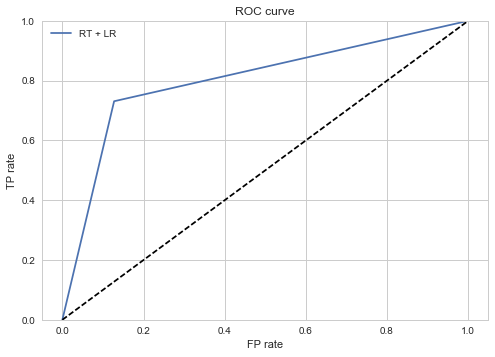

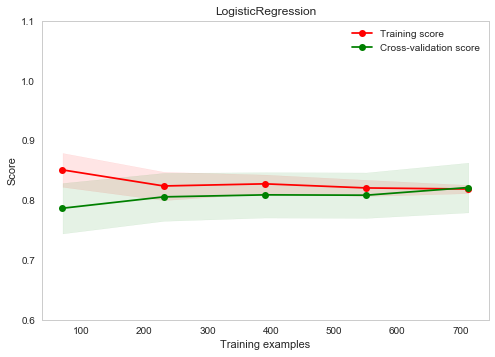

In [47]:
lr = LogisticRegression()
lr.fit(X_all, y_all)
y_all_pred_lr = lr.predict(X_all)

plot_roc_curve(y_all, y_all_pred_lr).show()
plot_learning_curve(lr, title='LogisticRegression', X=X_all, y=y_all, cv=cv).show()

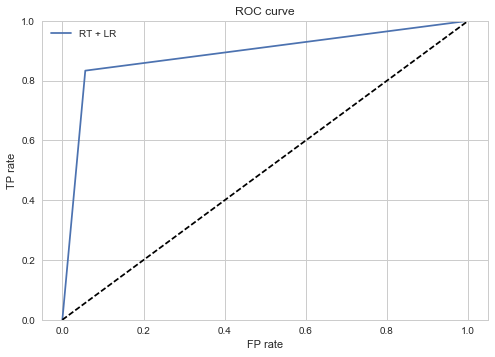

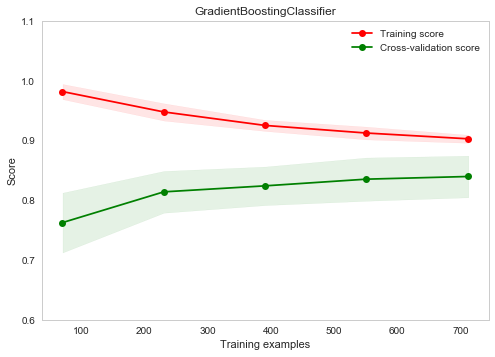

In [49]:
gb = GradientBoostingClassifier()
gb.fit(X_all, y_all)
y_all_pred_gb = gb.predict(X_all)

plot_roc_curve(y_all, y_all_pred_gb).show()
plot_learning_curve(gb, title='GradientBoostingClassifier', X=X_all, y=y_all, cv=cv).show()

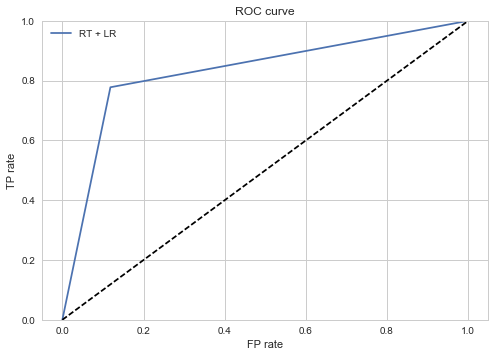

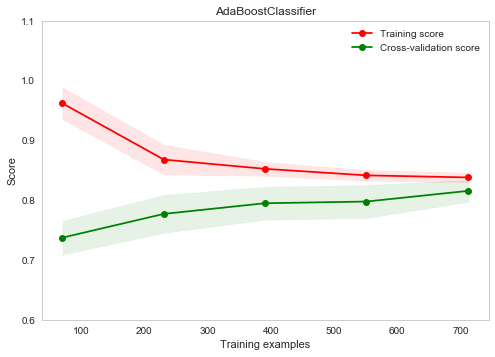

In [50]:
ab = AdaBoostClassifier()
ab.fit(X_all, y_all)
y_all_pred_ab = ab.predict(X_all)

plot_roc_curve(y_all, y_all_pred_ab).show()
plot_learning_curve(ab, title='AdaBoostClassifier', X=X_all, y=y_all, cv=cv).show()

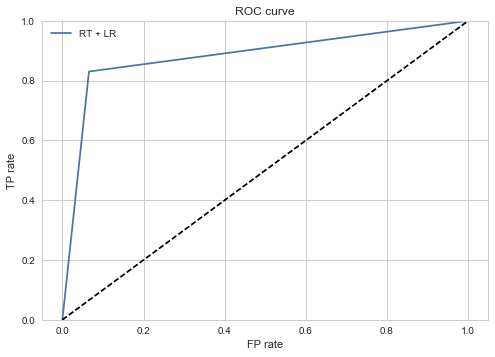

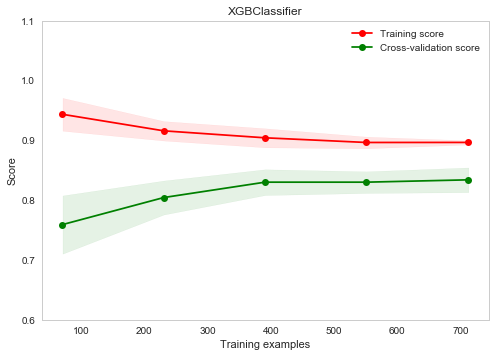

In [51]:
xgb = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
xgb.fit(X_all, y_all)
y_all_pred_xgb = xgb.predict(X_all)

plot_roc_curve(y_all, y_all_pred_xgb).show()
plot_learning_curve(xgb, title='XGBClassifier', X=X_all, y=y_all, cv=cv).show()

## ensembling

通过VotingClassifier把上面的算法ensemble，最为最终结果

In [52]:
estimators = []
estimators.append(('LogisticRegression', lr))
estimators.append(('GradientBoostingClassifier', gb))
estimators.append(('AdaBoostClassifier', ab))
estimators.append(('xgboost', xgb))

ensemble = VotingClassifier(estimators = estimators)
cross_val_score(ensemble, X=X_all, y=y_all, cv=cv).mean()

0.84636871508379896

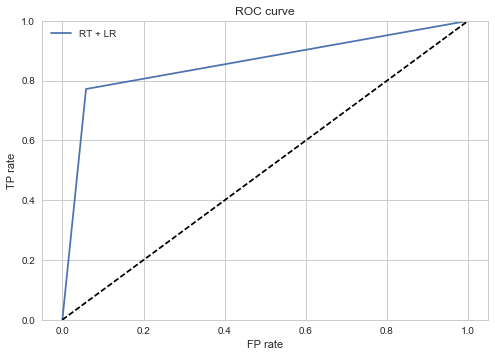

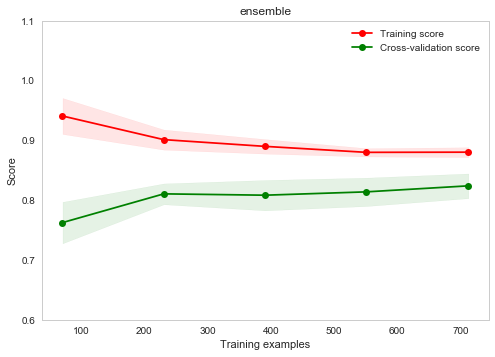

In [53]:
ensemble.fit(X_all, y_all)
y_all_pred_ensemble = ensemble.predict(X_all)

plot_roc_curve(y_all, y_all_pred_ensemble).show()
plot_learning_curve(ensemble, title='ensemble', X=X_all, y=y_all, cv=cv).show()

y_pred_ensemble = ensemble.predict(X_test)

In [54]:
submission = pd.DataFrame({
    "PassengerId": test_.PassengerId,
    "Survived": y_pred_ensemble
})
submission.to_csv('prediction.csv', index=False)